# פרוייקט סוף - מבוא לניתוח נתונים 
 

## Violence Against Women and Girls
The dataset contains information on people from third world countries and how they responded to a survey about an act that justifies beating a woman or girl.\
[link to the data source](https://www.kaggle.com/andrewmvd/violence-against-women-and-girls)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = 'https://raw.githubusercontent.com/mishafine/project2021/main/violence_data%20%20best.csv'
violence_df = pd.read_csv(url)

explanation of the colomns

<img src="description table.png"> 

## 1. Wrangling Data

 :בדיקת סוג העמודות

In [3]:
violence_df2 = violence_df.copy(deep = True)
violence_df2.dtypes

RecordID                   int64
Country                   object
Gender                    object
Demographics Question     object
Demographics Response     object
Question                  object
Survey Year               object
Value                    float64
HDI                        int64
dtype: object

:תיקון עמודת תאריך לדייט טיים והוספת עמודת שנים  

In [4]:
violence_df2['Survey Year'] = pd.to_datetime(violence_df2['Survey Year'])
violence_df2['Year'] = pd.DatetimeIndex(violence_df2['Survey Year']).year
violence_df2.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,HDI,Year
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,2015-01-01,NaN,169,2015
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015-01-01,10.1,169,2015
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015-01-01,13.7,169,2015
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015-01-01,13.8,169,2015
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,13.8,169,2015


:בדיקת ערכים חסרים 

In [5]:
violence = violence_df2
violence.isnull().sum().sort_values(ascending = False)

Value                    1413
Year                        0
HDI                         0
Survey Year                 0
Question                    0
Demographics Response       0
Demographics Question       0
Gender                      0
Country                     0
RecordID                    0
dtype: int64

בחרנו למלא את הערכים החסרים בשיטה לינארית מכיוון שראינו שהערכים עולים באופן הגיוני מאפס לכמעט 90

In [6]:
violence['Value'] = violence[['Value']].interpolate(method = 'linear')
violence['Value'] = violence[['Value']].fillna(method='bfill')
violence.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,HDI,Year
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,2015-01-01,10.1,169,2015
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015-01-01,10.1,169,2015
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015-01-01,13.7,169,2015
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015-01-01,13.8,169,2015
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,13.8,169,2015


Using "cat.codes" for category data:

In [7]:
violence['Country1'] = violence['Country'].astype('category').cat.codes
violence['Gender1'] = violence['Gender'].astype('category').cat.codes
violence['Question1'] = violence['Question'].astype('category').cat.codes

## 2. Understanding The Data

מראים את הסימטריה בעמודת המגדר של הדאטה 

<AxesSubplot:ylabel='Gender'>

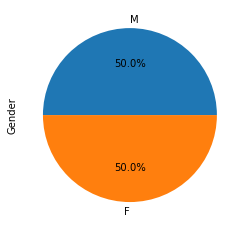

In [8]:
violence['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

We chose to fill the missing values with linear method because we saw that the values increase logically from zero to almost 90.

אחוזי הסכמה של גברים לעומת נשים לכל שאלה בסקר

In [9]:
violence.pivot_table(index= ['Gender'],columns= ['Question'],values= 'Value')

Question,... for at least one specific reason,... if she argues with him,... if she burns the food,... if she goes out without telling him,... if she neglects the children,... if she refuses to have sex with him
Gender,,,,,,
F,36.487524,21.830071,11.701271,23.395000,26.700333,16.663619
M,27.249002,16.647607,10.412081,16.697679,19.635719,11.178283


היינו מצפים לראות התפלגות הפוכה , שגברים יצדיקו יותר אלימות כלפי נשים 

Scettering of the data in the column "Value":

<AxesSubplot:>

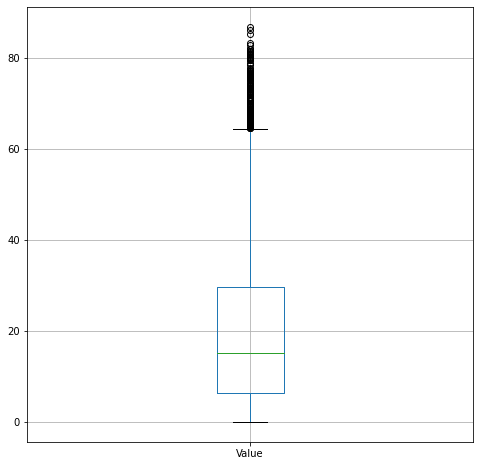

In [10]:
plt.figure(figsize=(8,8))
violence.boxplot("Value")

הצגה בצורה גרפית של עמודת אחוז ההסכמה ביחס לשנה 

<AxesSubplot:xlabel='Year'>

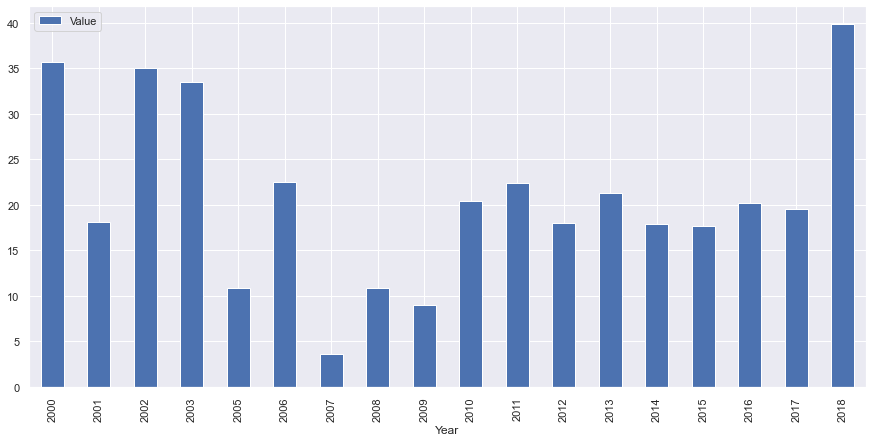

In [11]:
sns.set(style='darkgrid')
pd.pivot_table(violence,index = ['Year'], values = ['Value']).plot(kind='bar',figsize=(15,7))


הצגת כמות המדינות בדאטה

In [12]:
len(violence['Country'].unique())

70

הצגת כמות המדינות שנדגמו בשנת 2007

In [13]:
year7 = violence.loc[violence['Year'] == 2007]
len(year7['Country'].unique())

1

הצגת כמות המדינות שנדגמו בשנת 2018

In [14]:
year18 = violence.loc[violence['Year'] == 2018]
len(year18['Country'].unique())

2


הסקר לא נערך באופן עקבי לאורך השנים. מדי שנה נערך הסקר במספר מדינות שונה. בגרף זה אנו יכולים לראות כי על אף שמעט מדינות נסקרו בשנים בהן אחוז ההסכמה עם הסקר היה גבוה מאוד בשנת 2018 ונמוך מאוד בשנת 2007. איננו יכולים ללמוד משהו על הפער בין השנים מכיוון שאיננו יודע כמה אנשים נסקרו מדי שנה.

#### מספר השורות ביחס לטור "שאלה דמוגרפית", שייכותם הדמוגרפית של המשיבים

<AxesSubplot:xlabel='Demographics Question', ylabel='count'>

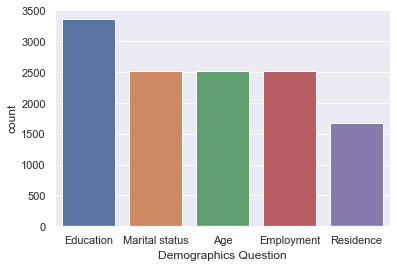

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize=(6,4)) 
sns.countplot(x="Demographics Question", data=violence,order = violence['Demographics Question'].value_counts().index)


#### אחוז המצדיקים אלימות כלפי נשים ביחס לרמת ההשכלה שלהם
##### גברים לעומת נשים

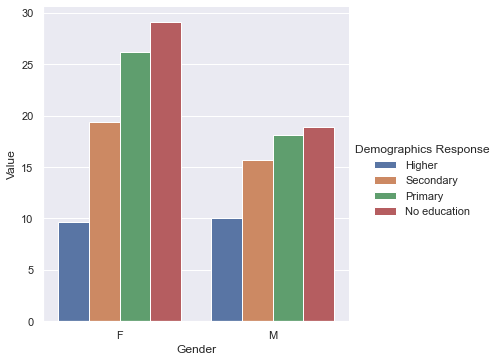

In [16]:
education = violence[violence.loc[:,'Demographics Question'] == 'Education']
sns.catplot(x="Gender", y="Value", hue="Demographics Response", kind="bar", data=education,ci=None)
plt.show()

---

>##### Observation 1:
>
> ישנו קשר ישיר בין רמת חינוך הבנאדם לבין הלגיטימציה שהוא נותן לאלימות כלפי נשים 
>
> 
---

### הוספנו עמודה של רמת המדינה בעולם לפי טבלת דירוג עולמית שמדרגת לפי פרמטרים של תמג,תלג, רמת השכלה וכו'... ככל שהערך יותר גבוה כך המדינה פחות מפותחת

<img src="country comparison.png"> 

In [17]:
min_max = violence.loc[(violence.HDI==violence.HDI.min())|(violence.HDI==120)|(violence.HDI==violence.HDI.max())]
min_max.tail()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,HDI,Year,Country1,Gender1,Question1
11515,204,Turkey,M,Residence,Urban,... if she goes out without telling him,2013-01-01,43.760440,54,2013,63,1,3
11516,274,Turkey,M,Residence,Rural,... if she neglects the children,2013-01-01,44.248352,54,2013,63,1,4
11517,274,Turkey,M,Residence,Urban,... if she neglects the children,2013-01-01,44.736264,54,2013,63,1,4
11518,344,Turkey,M,Residence,Rural,... if she refuses to have sex with him,2013-01-01,45.224176,54,2013,63,1,5
11519,344,Turkey,M,Residence,Urban,... if she refuses to have sex with him,2013-01-01,45.712088,54,2013,63,1,5


בדקנו את הקשר בין דרגת המדינה בעולם לליגיטמציה לאלימות ב3 מדינות\
טורקיה:דרגה 54 , הכי נמוכה בטבלה\
קירגיסטאן:דרגה 120 , ממוקמת בדירוג אמצעי בטבלה\
צ'אד:דרגה 187 בעולם, ממוקמת בתחתית הדירוגים בדאטה

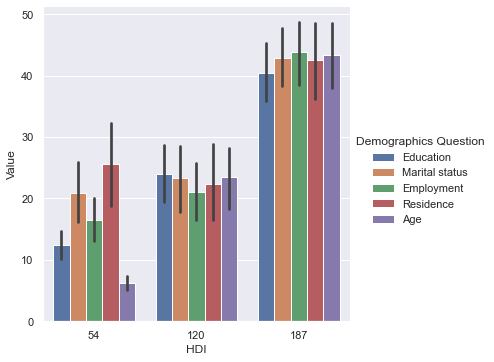

In [18]:
sns.catplot(x="HDI", y="Value", hue="Demographics Question", kind="bar", data=min_max)
plt.show()

---

>##### Observation 2:
>
> ניתן לראות שישנו קשר ישיר בין רמת הפיתוח של המדינה לבין מתן הליגיטימציה לאלימות כלפי נשים  
>
> 
---

#### הבדל בין תשובות שענו אנשים כפריים לבין עירוניים

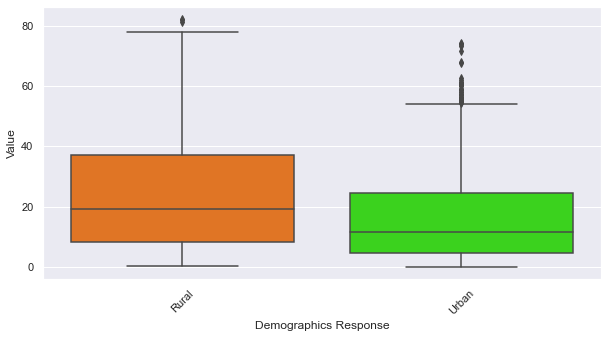

In [19]:
residence = violence.loc[violence['Demographics Question'] == "Residence"]
plt.figure(figsize = (10,5))
ax = sns.boxplot(x='Demographics Response', y='Value', data=residence, palette='gist_ncar_r')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

הצגה בבוקס פלוט של טורקיה ,המדינה הכי מפותחת במדגם

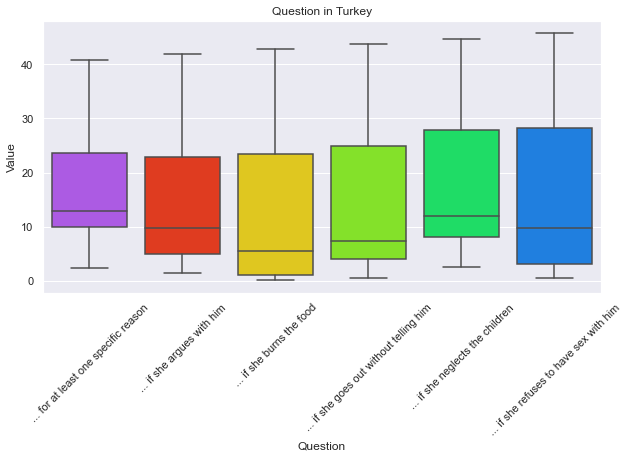

In [20]:
turkey = violence.loc[violence['Country'] == 'Turkey']
fig=plt.figure(1, figsize = (10,5))
plt.title("Question in Turkey")
ax = sns.boxplot(x='Question',y='Value',data=turkey,palette='gist_ncar_r')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

הצגה בבוקס פלוט של צ'אד ,המדינה הכי פחות מפותחת במדגם

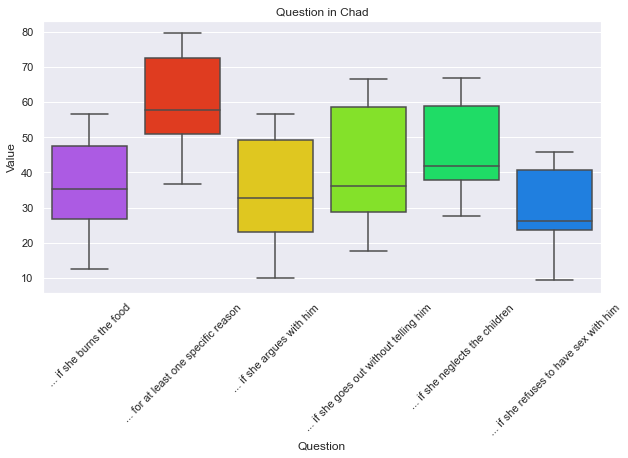

In [21]:
chad = violence.loc[violence['Country'] == 'Chad']
fig=plt.figure(1, figsize = (10,5))
plt.title("Question in Chad")
ax = sns.boxplot(x='Question',y='Value',data=chad,palette='gist_ncar_r')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

מראה את צאד לעומת שאר המדינות במדגם ושם לב שהם גבוהים יותר בכל השאלות , אבל בשאלה על שריפת האוכל גבוהים בצורה בולטת יותר


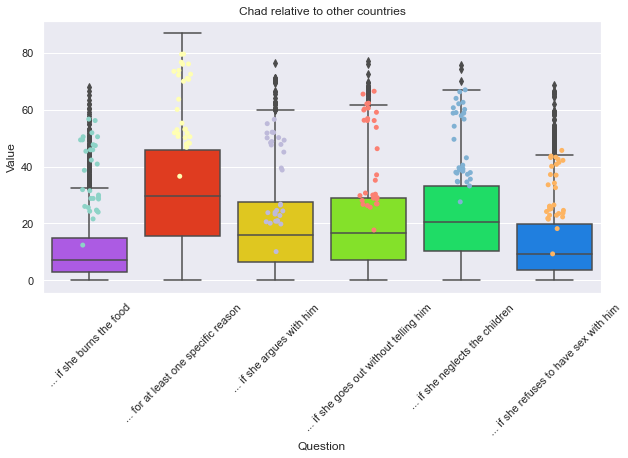

In [22]:
plt.figure(figsize = (10,5))
ax = sns.stripplot(x='Question',y='Value',data=chad,palette='Set3')
plt.setp(ax.get_xticklabels(), rotation=45)
ax1 = sns.boxplot(x='Question',y='Value',data=violence,palette='gist_ncar_r')
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.title("Chad relative to other countries")
plt.show()

מראה את טורקיה לעומת שאר מדינות המדגם ונשים לב שטורקיה נמוכה יותר באופן יחסי משאר המדינות במדגם , חוץ מהשאלה על שריפת האוכל  

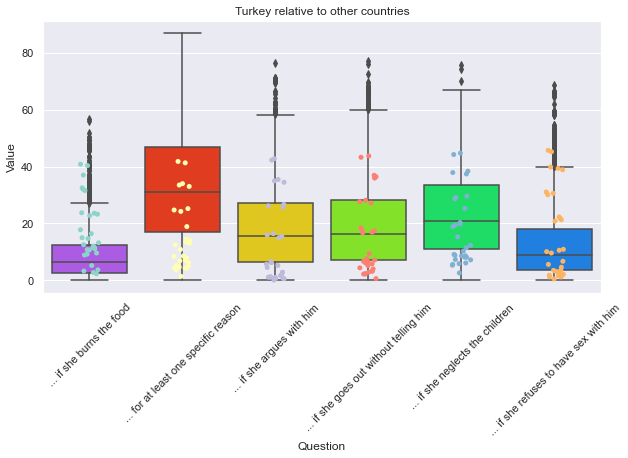

In [23]:
plt.figure(figsize = (10,5))
ax = sns.stripplot(x='Question',y='Value',data=turkey,palette='Set3')
plt.setp(ax.get_xticklabels(), rotation=45)
ax1 = sns.boxplot(x='Question',y='Value',data=violence_df,palette='gist_ncar_r')
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.title("Turkey relative to other countries")
plt.show()


---

>##### Observation 3:
>
> מכאן נסיק שישנו הבדל ברור בין מדינות כפריות יותר למדינות עירוניות . ניתן לראות שבצאד שהיא מדינה כפרית ברובה יש לגיטימציה גבוהה יותר לאלימות 
לעומת טורקיה שהיא מדינה עירונית ברובה שם הלגיטימציה נמוכה בהרבה 

 
>בנוסף ניתן לראות את השוני הגדול שיש בעיקר בשאלה על שריפת האוכל שבמדינה כמו צאד שאוכל שם אינו דבר מובן מאליו ולכן התשובות שם קיצוניות בנושא
> 
---

## 3. Building a Model - אחרי שהראנו כיצד רמת ההשכלה משפיעה על ההצדקה, נעשה חיזוי עפ אותם קרטריונים

פונציות להערכה , חיזוי ובניית עץ.

In [24]:
def eval(x_test1,y_test1,model1):
    pred = model1.predict(x_test1)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test1,squared=False)))

In [25]:
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

### Model : Predicting Value by Gender, Country and Education.

לאחר שהראנו קשר בין רמת הלגטימציה לאלימות לבין רמת המשכל , נעשה חיזוי של רמת הלגיטימציה של אלימות כלפי נשים על פי מין מדינה ורמת משכל.

In [33]:
education['Demographics Response1'] = education['Demographics Response'].astype('category').cat.codes

<ipython-input-33-b37ed74d123c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education['Demographics Response1'] = education['Demographics Response'].astype('category').cat.codes


In [34]:
category = ['Gender1','Country1','Demographics Response1']
X = education[category]
y = education['Value']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

בדקנו באיזה עומק החיזוי יהיה הטוב ביותר.

In [35]:
for i in range(1,20):
    model2 = DecisionTreeRegressor(max_depth = i , random_state=1)
    model2.fit(X_train,y_train)
    print(i , eval(X_test,y_test,model2)) 

MSE: 16.226
1 None
MSE: 15.743
2 None
MSE: 15.615
3 None
MSE: 15.552
4 None
MSE: 15.170
5 None
MSE: 14.748
6 None
MSE: 14.169
7 None
MSE: 13.553
8 None
MSE: 13.492
9 None
MSE: 13.136
10 None
MSE: 12.946
11 None
MSE: 12.901
12 None
MSE: 12.337
13 None
MSE: 11.960
14 None
MSE: 11.464
15 None
MSE: 11.684
16 None
MSE: 11.486
17 None
MSE: 11.398
18 None
MSE: 11.498
19 None


In [36]:
model2 = DecisionTreeRegressor(max_depth = 18,random_state=1)
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, random_state=1)

In [37]:
pred2 = model2.predict(X_test)
val_pred2 = pd.DataFrame(columns = ['Value', 'Predictions'])
val_pred2['Value'] = y_test
val_pred2 = val_pred2.reset_index(drop=True)
val_pred2['Predictions'] = pd.Series(pred2)
val_pred2.head(3)

,Value,Predictions
0,21.7,9.333333
1,63.8,44.125000
2,10.0,4.491667


In [38]:
eval(X_test,y_test,model2)

MSE: 11.398


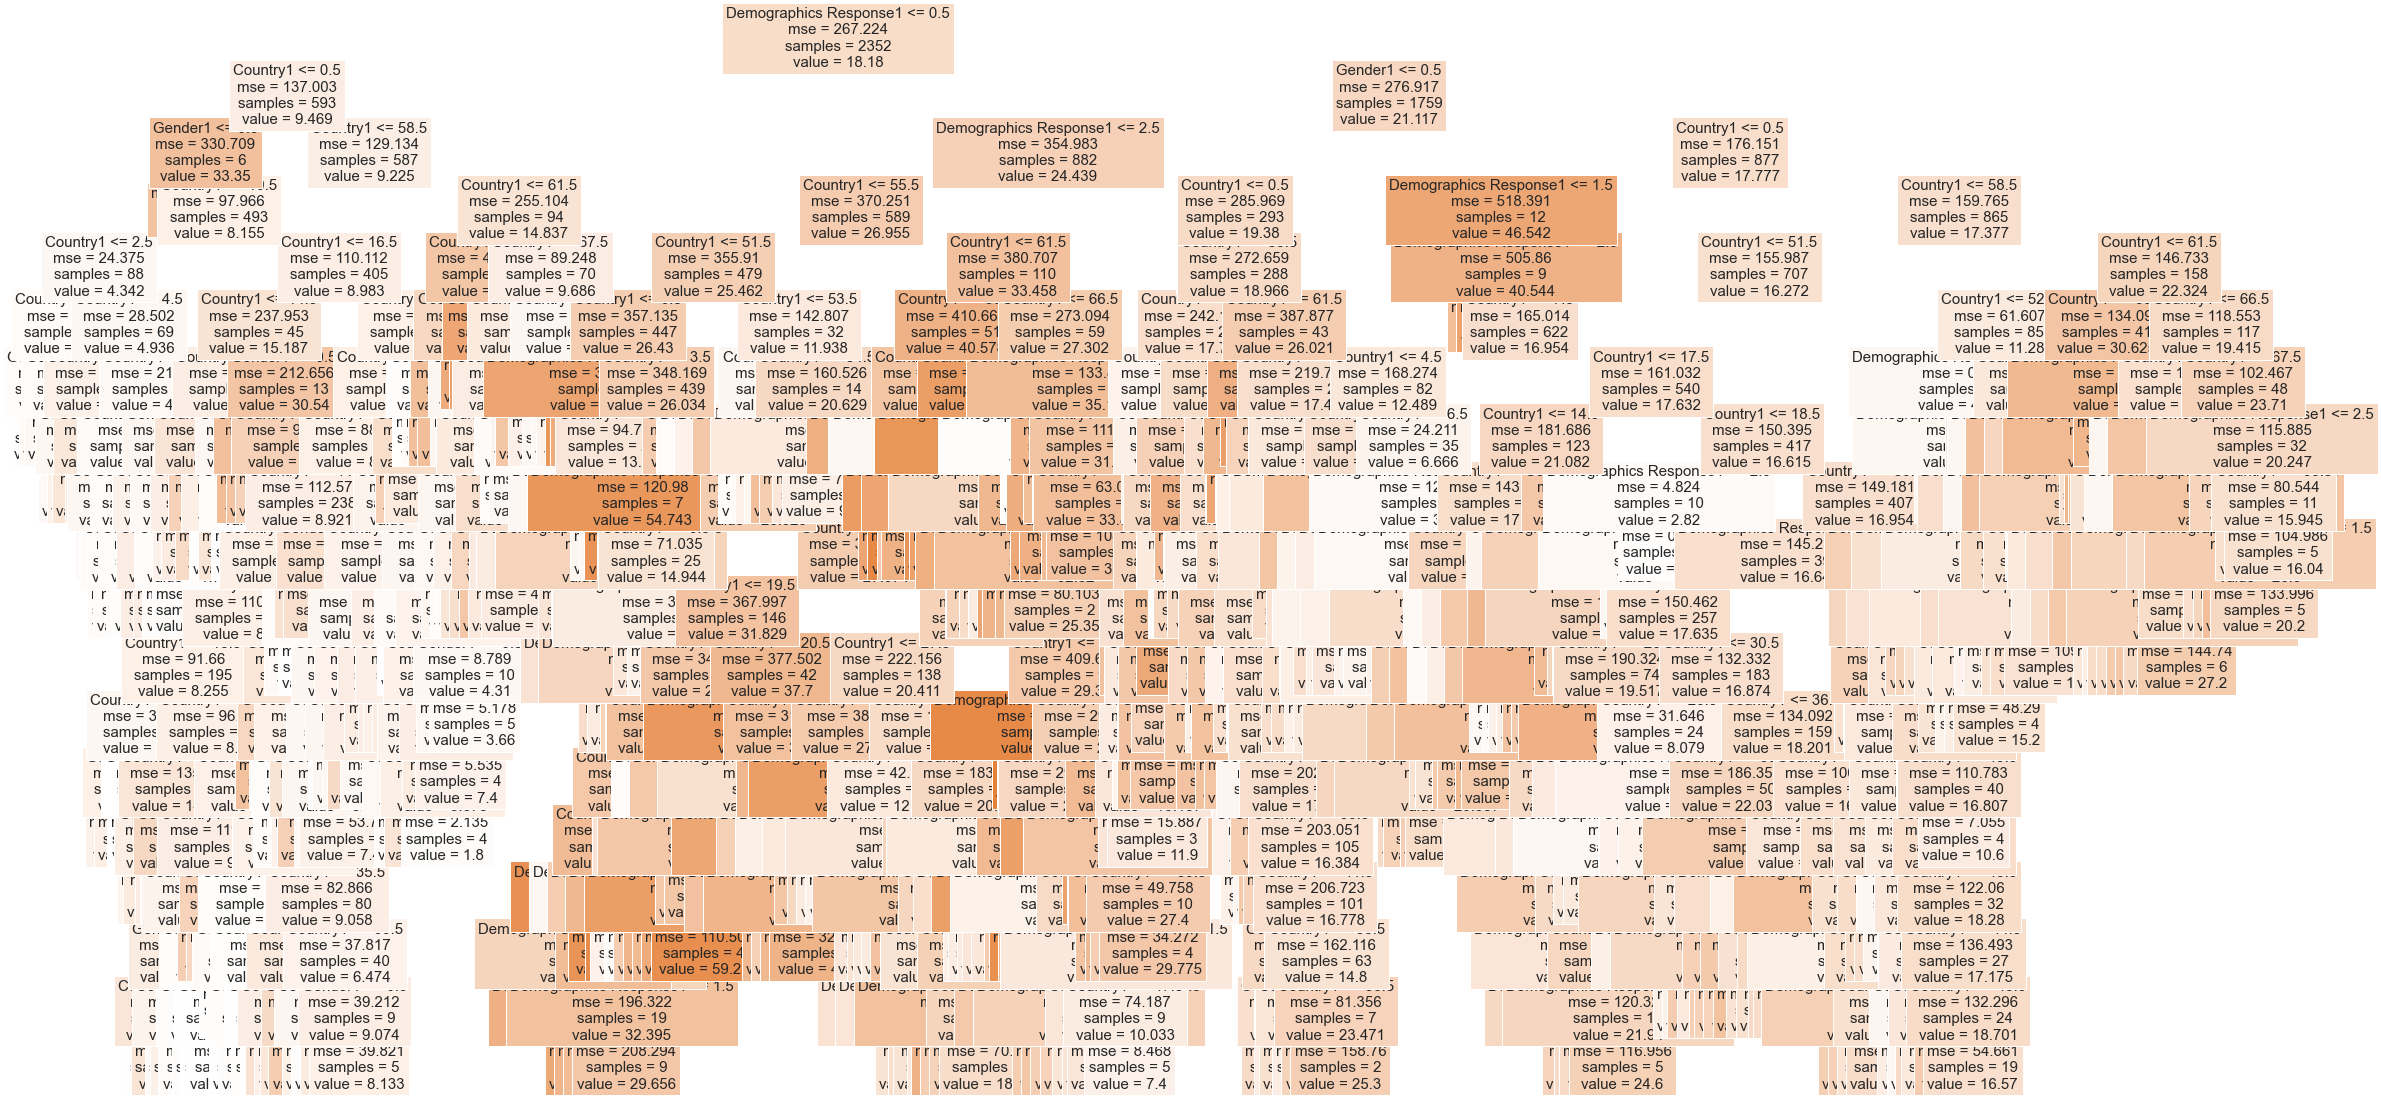

In [39]:
plot_tree(model2,X_test.columns,size=(40,20))